In [1]:
%matplotlib notebook
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
fruits_data = pd.read_table(r"C:\Users\kd67152\Desktop\Datasets\fruit_data_with_colors.txt")

In [3]:
fruits_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
lookup_fruits_name = dict(zip(fruits_data.fruit_label.unique(),fruits_data.fruit_name.unique()))
lookup_fruits_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

# Create Train_test Split

In [5]:
X = fruits_data[['mass','width','height']]
y = fruits_data['fruit_label']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [6]:
X_test.shape

(15, 3)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [8]:
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [9]:
knn.score(X_test,y_test)

0.5333333333333333

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.5333333333333333

In [10]:
fruit_prediction = knn.predict([[192,3,8.4],[150,2,3],])
print(lookup_fruits_name[fruit_prediction[0]])
lookup_fruits_name[fruit_prediction[1]]

lemon


C:\Users\kd67152\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'apple'

In [11]:
fruit_prediction = knn.predict([[300,6.3,6.5]])
lookup_fruits_name[fruit_prediction[0]]

C:\Users\kd67152\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'orange'

<IPython.core.display.Javascript object>


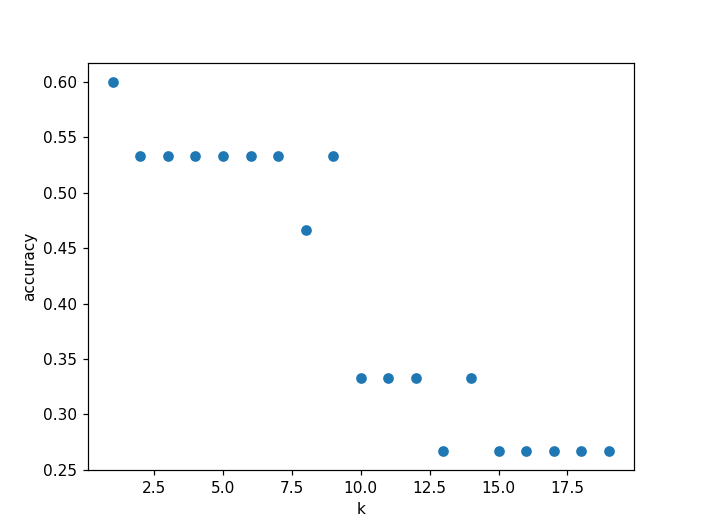

In [14]:
k_range=range(1,20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    scores.append(knn.score(X_test,y_test))
    
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range,scores)
plt.show()